In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
%cd "C:\DSBA\Applied ML\Datathon"

C:\DSBA\Applied ML\Datathon


In [3]:
df=pd.read_csv('training_v2.csv')
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [ ]:
##Grpup missing values into lab buckets

In [5]:
##skip this
df['Lab_gas_missing']=df[['d1_arterial_pco2_max',
                             'd1_arterial_pco2_min',
                             'd1_arterial_ph_max',
                             'd1_arterial_ph_min',
                             'd1_arterial_po2_max',
                             'd1_arterial_po2_min',
                             'd1_pao2fio2ratio_max',
                             'd1_pao2fio2ratio_min',
                             'h1_arterial_pco2_max',
                             'h1_arterial_pco2_min',
                             'h1_arterial_ph_max',
                             'h1_arterial_ph_min',
                             'h1_arterial_po2_max',
                             'h1_arterial_po2_min',
                             'h1_pao2fio2ratio_max',
                             'h1_pao2fio2ratio_min']].count(axis=1)

In [6]:
##skip this
df['Vital_missing']=df[["d1_diasbp_invasive_max","d1_diasbp_invasive_min","d1_mbp_invasive_max","d1_mbp_invasive_min","d1_sysbp_invasive_max","d1_sysbp_invasive_min","h1_diasbp_invasive_max","h1_diasbp_invasive_min","h1_mbp_invasive_max","h1_mbp_invasive_min","h1_sysbp_invasive_max","h1_sysbp_invasive_min"]].count(axis=1)
df['Labs_missing']=df[["d1_albumin_max","d1_albumin_min","d1_bilirubin_max","d1_bilirubin_min","d1_inr_max","d1_inr_min","d1_lactate_max","d1_lactate_min","h1_albumin_max","h1_albumin_min","h1_bilirubin_max","h1_bilirubin_min","h1_bun_max","h1_bun_min","h1_calcium_max","h1_calcium_min","h1_creatinine_max","h1_creatinine_min","h1_glucose_max","h1_glucose_min","h1_hco3_max","h1_hco3_min","h1_hemaglobin_max","h1_hemaglobin_min","h1_hematocrit_max","h1_hematocrit_min","h1_inr_max","h1_inr_min","h1_lactate_max","h1_lactate_min","h1_platelets_max","h1_platelets_min","h1_potassium_max","h1_potassium_min","h1_sodium_max","h1_sodium_min","h1_wbc_max","h1_wbc_min"]].count(axis=1)

In [7]:
##skip this
df_agg = df.drop(['d1_arterial_pco2_max','d1_arterial_pco2_min',"d1_diasbp_invasive_max","d1_diasbp_invasive_min","d1_mbp_invasive_max","d1_mbp_invasive_min","d1_sysbp_invasive_max","d1_sysbp_invasive_min","h1_diasbp_invasive_max","h1_diasbp_invasive_min","h1_mbp_invasive_max","h1_mbp_invasive_min","h1_sysbp_invasive_max","h1_sysbp_invasive_min",
                             'd1_arterial_ph_max','d1_arterial_ph_min',"d1_albumin_max","d1_albumin_min","d1_bilirubin_max","d1_bilirubin_min","d1_inr_max","d1_inr_min","d1_lactate_max","d1_lactate_min","h1_albumin_max","h1_albumin_min","h1_bilirubin_max","h1_bilirubin_min","h1_bun_max","h1_bun_min","h1_calcium_max","h1_calcium_min","h1_creatinine_max","h1_creatinine_min","h1_glucose_max","h1_glucose_min","h1_hco3_max","h1_hco3_min","h1_hemaglobin_max","h1_hemaglobin_min","h1_hematocrit_max","h1_hematocrit_min","h1_inr_max","h1_inr_min","h1_lactate_max","h1_lactate_min","h1_platelets_max","h1_platelets_min","h1_potassium_max","h1_potassium_min","h1_sodium_max","h1_sodium_min","h1_wbc_max","h1_wbc_min",
                             'd1_arterial_po2_max','d1_arterial_po2_min','d1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min',
                             'h1_arterial_ph_max','h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min'], axis=1)

In [10]:
##skip this
df_agg.to_csv("ck.csv")

In [4]:
##Take selected columns from excel
df_dict=pd.read_excel('C:\DSBA\Applied ML\Datathon\Dictionary_ver_1.0.xlsx',sheet_name='Col_list')
df=df[df_dict['Green'].tolist()]
df.head(10)

,encounter_id,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,118,25312,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,81,59342,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,118,50777,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,118,46918,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,33,34377,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,83,74489,0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,83,49526,0,59.0,57.45,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,33,50129,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,118,10577,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,118,90749,0,50.0,25.71,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [5]:
df.select_dtypes(include='object').columns

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')

In [ ]:
##Remove rows with na

In [18]:
df.isnull().sum().sort_values(ascending=False)

bilirubin_apache         58134
albumin_apache           54379
urineoutput_apache       48998
wbc_apache               22012
h1_temp_max              21732
                         ...  
icu_type                     0
pre_icu_los_days             0
readmission_status           0
apache_post_operative        0
encounter_id                 0
Length: 114, dtype: int64

In [7]:
data=df.dropna()
data.shape

(7357, 114)

In [ ]:
##Create dummy variables

In [8]:
cat_var = ['ethnicity', 'gender', 'icu_admit_source','icu_stay_type', 'icu_type', 'apache_3j_bodysystem','apache_2_bodysystem']
num_var=[]
for ls in data.columns:
    if ls not in cat_var:
        num_var.append(ls)
categorical_df = pd.get_dummies(data[cat_var], drop_first=True)
numerical_df = data[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
8131,0,1,0,0,0,0,0,0,0,0,...,0.06,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8132,0,1,0,0,0,0,0,0,0,0,...,0.15,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8134,0,1,0,0,0,0,0,0,0,0,...,0.11,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8136,0,0,0,1,0,1,1,0,0,0,...,0.11,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8139,0,1,0,0,0,1,0,0,0,0,...,0.28,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##Random forest for feature selection

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
y=new_df['hospital_death']
X=new_df.drop(['hospital_death',"encounter_id","hospital_id","patient_id",'icu_id'],axis=1)

In [11]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,apache_4a_hospital_death_prob,0.056068
1,apache_4a_icu_death_prob,0.051583
2,d1_spo2_min,0.020528
3,temp_apache,0.018304
4,d1_sysbp_noninvasive_min,0.016376
...,...,...
135,apache_3j_bodysystem_Gynecological,0.000015
136,apache_3j_bodysystem_Musculoskeletal/Skin,0.000015
137,aids,0.000000
138,readmission_status,0.000000


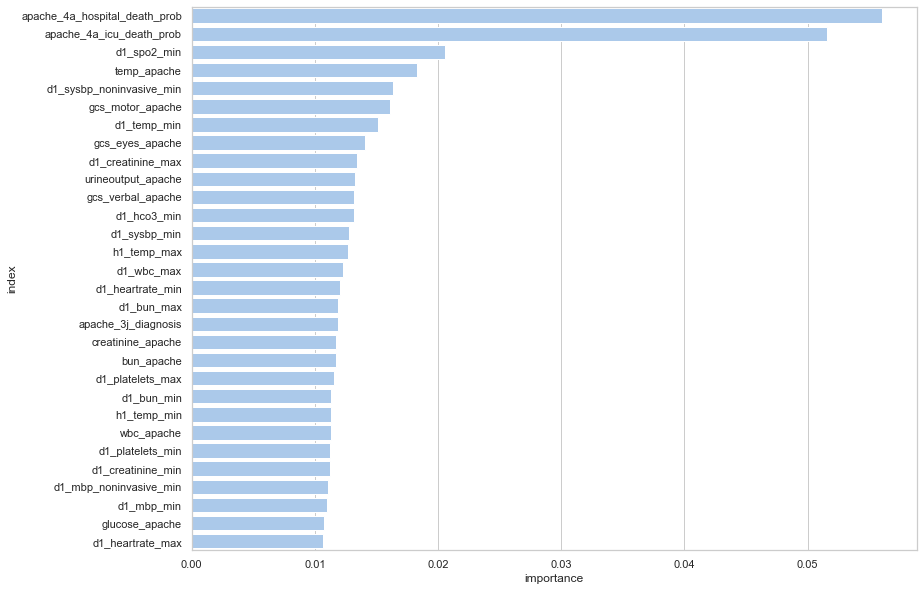

In [16]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances[:30],
            label="Total", color="b")

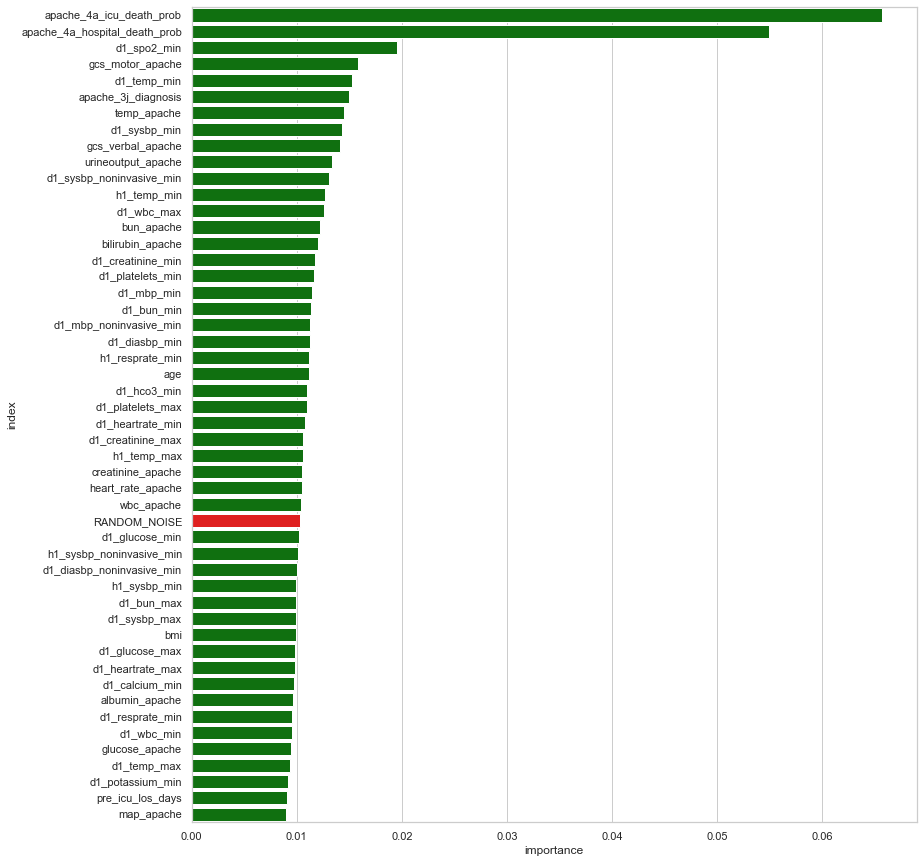

In [18]:
# Apply Random Noise to data set
X_train_rnoise = X.copy()
X_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, X_train_rnoise.shape[0])

# Fit Random Forest to DataSet
rf_random = RandomForestClassifier()
rf_random = rf_random.fit(X_train_rnoise, y)

# Get Feature Importances
feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = X_train_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))


clrs = ['red' if (x == list(pd.DataFrame(feature_importances_random)['index'].values).index('RANDOM_NOISE') ) else 'green' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random[:50],
            label="Total",  palette=clrs)

In [110]:
##Find correlation for top predictors
data[pd.DataFrame(feature_importances_random)['index'].values[0:28]].corr().to_csv("RF_corr.csv")

In [ ]:
##ANOVA feature selection

In [135]:
kb = SelectKBest(k=30)
kb.fit(X, y)
names = X.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=
['Feat_names','F_Scores'])
ns_df_sorted = ns_df.sort_values(['F_Scores','Feat_names'], ascending =
[False, True])
print(ns_df_sorted)

                       Feat_names    F_Scores
28  apache_4a_hospital_death_prob  423.084286
29       apache_4a_icu_death_prob  406.968435
5                gcs_motor_apache  213.574976
16                    d1_temp_min  157.863302
13                    d1_spo2_min  137.346796
4                 gcs_eyes_apache  130.379405
11                     d1_mbp_min  129.216005
12         d1_mbp_noninvasive_min  129.131079
15       d1_sysbp_noninvasive_min  123.885647
14                   d1_sysbp_min  123.866523
10      d1_diasbp_noninvasive_min  111.915857
9                   d1_diasbp_min  111.165977
7                     temp_apache  101.275252
24                    d1_hco3_min  101.127909
6               gcs_verbal_apache   82.110157
19                     d1_bun_max   80.980113
2                      bun_apache   72.677319
20                     d1_bun_min   71.930350
25                     d1_wbc_max   69.510020
1                  albumin_apache   67.943430
27           d1_pao2fio2ratio_min 

In [ ]:
##Recursive feature selection

In [136]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 30)
fit = rfe.fit(X, y)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Selected Features: [False False False False False  True False  True False False False False
 False False  True False False  True False False False False False  True
 False False False False False False False  True False  True False False
 False False  True False False False False False False  True False False
 False False  True False False  True  True False  True False False  True
 False False False False  True False False False False False False False
 False False False  True False False False  True False  True False False
 False False False  True False False False False False False False False
 False False False False False  True False False False False False  True
  True False False False  True False False False False False False  True
 False False False False  True False  True False  True False False False
 False False False False  True  True False False  True False False False
 False False]
Feature Ranking: [ 69 112  43  75 110   1  46   1  12 106 102 104  94  13   1  49  45   1
 

In [139]:
names = X.columns.values[fit.get_support()]
scores = fit.ranking_[fit.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=
['Feat_names','Ranking'])
ns_df_sorted = ns_df.sort_values(['Ranking','Feat_names'], ascending =
[False, True])
print(ns_df_sorted['Feat_names'])

7                                            age
8                                 albumin_apache
5                  apache_2_bodysystem_Metabolic
6        apache_2_bodysystem_Renal/Genitourinary
4                 apache_3j_bodysystem_Metabolic
27                 apache_4a_hospital_death_prob
28                      apache_4a_icu_death_prob
9                               bilirubin_apache
21                                    d1_bun_max
22                             d1_creatinine_max
23                             d1_hemaglobin_min
15                                    d1_mbp_min
24                              d1_potassium_max
16                               d1_resprate_min
25                                 d1_sodium_max
17                                   d1_spo2_min
18                                   d1_temp_min
26                                    d1_wbc_max
29                             diabetes_mellitus
10                               gcs_eyes_apache
11                  

In [ ]:
###Impute and "missing to columns"

In [143]:
cat_var = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source','icu_stay_type', 'icu_type', 'apache_3j_bodysystem','apache_2_bodysystem']
num_var=[]
for ls in df.columns:
    if ls not in cat_var:
        num_var.append(ls)
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,1,0,0,0,1,0,0,0,1,...,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,1,...,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,1,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
df.isnull().sum().sort_values(ascending=False)

d1_pao2fio2ratio_max     66008
d1_pao2fio2ratio_min     66008
d1_arterial_pco2_max     59271
d1_arterial_pco2_min     59271
d1_arterial_po2_max      59262
                         ...  
icu_type                     0
pre_icu_los_days             0
readmission_status           0
apache_post_operative        0
encounter_id                 0
Length: 121, dtype: int64

In [ ]:
##Need to impute values for these top variables. They are significant as well.

In [151]:
df[["albumin_apache","bilirubin_apache","urineoutput_apache","d1_arterial_pco2_max","d1_arterial_pco2_min","d1_arterial_po2_max","d1_arterial_po2_min","d1_pao2fio2ratio_max","d1_pao2fio2ratio_min"]].quantile([.1, .25, .5, .75,1], axis = 0)

,albumin_apache,bilirubin_apache,urineoutput_apache,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min
0.10,2.0,0.3,308.275200,30.8,27.000,71.000,57.000,131.666667,82.000000
0.25,2.4,0.4,740.361600,36.0,32.000,88.100,69.000,192.285714,132.500000
0.50,2.9,0.6,1386.201600,42.8,37.000,127.000,85.000,272.666667,205.000000
0.75,3.4,1.1,2324.548800,50.0,43.000,206.000,116.000,365.000000,300.000000
1.00,4.6,51.0,8716.669632,111.0,85.912,540.865,448.892,834.805000,604.227778


Text(0, 0.5, 'Frequency')

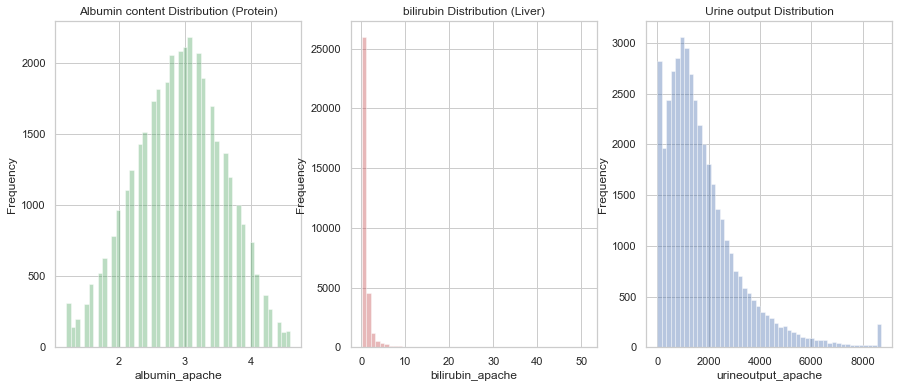

In [152]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# albumin
sns.distplot(df.albumin_apache, kde=False, color="g", ax=axes[0]).set_title('Albumin content Distribution (Protein)')
axes[0].set_ylabel('Frequency')

# bilirubin
sns.distplot(df.bilirubin_apache, kde=False, color="r", ax=axes[1]).set_title('bilirubin Distribution (Liver)')
axes[1].set_ylabel('Frequency')

# urine
sns.distplot(df.urineoutput_apache, kde=False, color="b", ax=axes[2]).set_title('Urine output Distribution')
axes[2].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

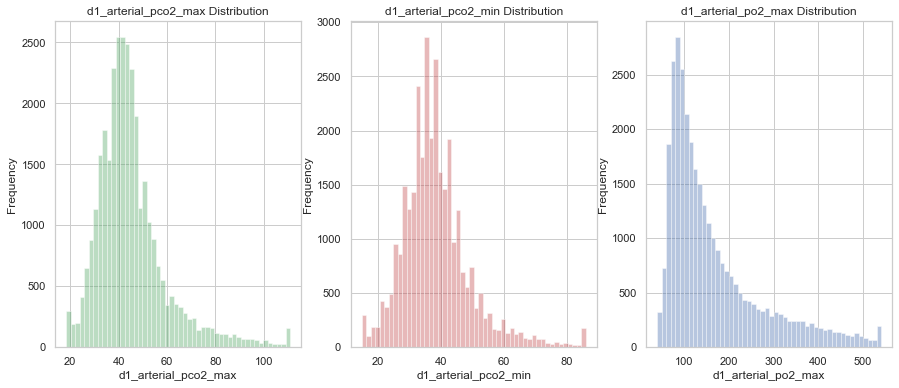

In [185]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# albumin
sns.distplot(df.d1_arterial_pco2_max, kde=False, color="g", ax=axes[0]).set_title('d1_arterial_pco2_max Distribution')
axes[0].set_ylabel('Frequency')

# bilirubin
sns.distplot(df.d1_arterial_pco2_min, kde=False, color="r", ax=axes[1]).set_title('d1_arterial_pco2_min Distribution')
axes[1].set_ylabel('Frequency')

# urine
sns.distplot(df.d1_arterial_po2_max, kde=False, color="b", ax=axes[2]).set_title('d1_arterial_po2_max Distribution')
axes[2].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

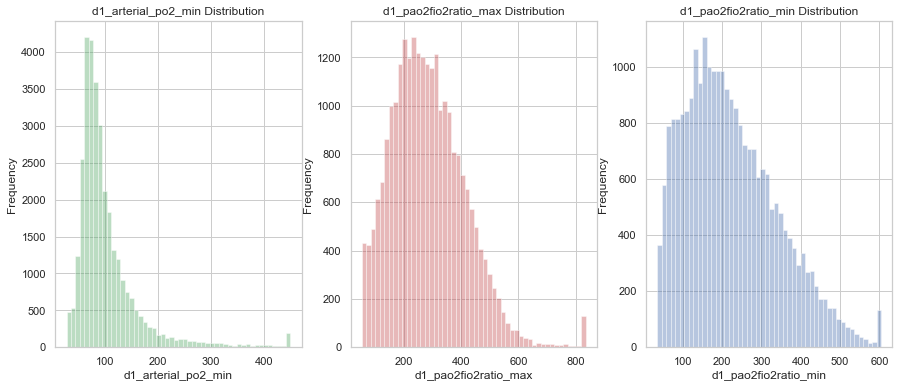

In [186]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# d1_arterial_po2_min
sns.distplot(df.d1_arterial_po2_min, kde=False, color="g", ax=axes[0]).set_title('d1_arterial_po2_min Distribution')
axes[0].set_ylabel('Frequency')

# d1_pao2fio2ratio_max
sns.distplot(df.d1_pao2fio2ratio_max, kde=False, color="r", ax=axes[1]).set_title('d1_pao2fio2ratio_max Distribution')
axes[1].set_ylabel('Frequency')

# d1_pao2fio2ratio_min
sns.distplot(df.d1_pao2fio2ratio_min, kde=False, color="b", ax=axes[2]).set_title('d1_pao2fio2ratio_min Distribution')
axes[2].set_ylabel('Frequency')

*The variables are skewed. We need to check other variables that are float*

In [ ]:
#Skewness and kurtosis

In [174]:
skew=pd.DataFrame(df[list(df.select_dtypes(include='float64').columns)].skew(axis = 0, skipna = True))
skew.reset_index(inplace=True)
skew.columns=['column','skew']
skew

,column,skew
0,age,-0.624474
1,bmi,1.440833
2,height,-0.101455
3,pre_icu_los_days,10.988615
4,weight,1.069070
...,...,...
100,hepatic_failure,8.602445
101,immunosuppression,5.936870
102,leukemia,11.769991
103,lymphoma,15.460530


In [177]:
kurt=pd.DataFrame(df[list(df.select_dtypes(include='float64').columns)].kurtosis(axis = 0, skipna = True))
kurt.reset_index(inplace=True)
kurt.columns=['column','kurt']

In [179]:
#Merge both
pd.merge(skew,kurt,on='column',how='left')

*Now we have list of variables whos skewness is high.Lets plot and see for a few*

Text(0, 0.5, 'Frequency')

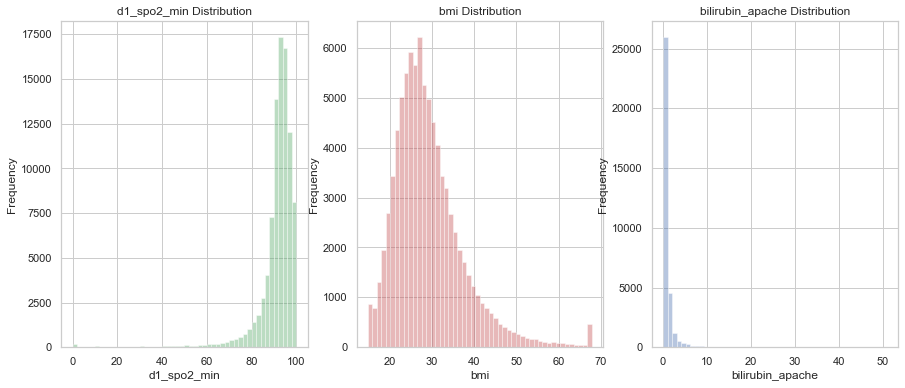

In [184]:
# Plot the distribution of these variables?
#d1_spo2_min:-1.2
#d1_resprate_max:2.49
#bilirubin_apache:8.5

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# gcs_verbal_apache
sns.distplot(df.d1_spo2_min, kde=False, color="g", ax=axes[0]).set_title('d1_spo2_min Distribution')
axes[0].set_ylabel('Frequency')

# bmi
sns.distplot(df.bmi, kde=False, color="r", ax=axes[1]).set_title('bmi Distribution')
axes[1].set_ylabel('Frequency')

# urine
sns.distplot(df.bilirubin_apache, kde=False, color="b", ax=axes[2]).set_title('bilirubin_apache Distribution')
axes[2].set_ylabel('Frequency')

In [ ]:
############################ start from df

In [34]:
cat_var = ['ethnicity', 'gender', 'icu_admit_source','icu_stay_type', 'icu_type', 'apache_3j_bodysystem','apache_2_bodysystem']
num_var=[]
for ls in df.columns:
    if ls not in cat_var:
        num_var.append(ls)
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,1,0,0,0,1,1,0,0,0,...,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,1,0,0,0,...,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,1,0,0,...,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##Random forest impute

In [25]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [35]:
missing_var=list(new_df.columns[new_df.isnull().sum()>0])
independent_var = list(new_df.columns[new_df.isnull().sum()==0])#list(new_df.columns)

for ls in ["encounter_id","hospital_id","patient_id"]:
    independent_var.remove(ls)

for ls in missing_var:
#if new_df[ls].isnull().sum() > 0:
    df_with_var = new_df[pd.isnull(new_df[ls]) == False]
    df_without_var = new_df[pd.isnull(new_df[ls])]

    #independent_var.remove(ls)

    rfimpute = RandomForestRegressor()
    rfimpute.fit(df_with_var[independent_var], df_with_var[ls])

    generatedvarValues = rfimpute.predict(X=df_without_var[independent_var])

    df_without_var[ls] = generatedvarValues.astype(new_df[ls].dtype)
    data = df_with_var.append(df_without_var)

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)

    new_df=data.copy()

In [ ]:
df1=new_df.copy()

In [ ]:
###skew data normalize

In [33]:
skp=["apache_4a_hospital_death_prob","apache_4a_icu_death_prob","aids","cirrhosis","diabetes_mellitus","hepatic_failure","immunosuppression","leukemia","lymphoma","solid_tumor_with_metastasis","gcs_eyes_apache","gcs_motor_apache","gcs_unable_apache","gcs_verbal_apache"]
right_skewed=["pre_icu_los_days","arf_apache","bilirubin_apache","bun_apache","creatinine_apache","glucose_apache","intubated_apache","urineoutput_apache","wbc_apache","d1_resprate_max","h1_resprate_max","h1_resprate_min","d1_bun_max","d1_bun_min","d1_creatinine_max","d1_creatinine_min","d1_glucose_max","d1_wbc_max","d1_wbc_min"]
left_skewed=["d1_spo2_max","d1_spo2_min","d1_temp_min","h1_spo2_max","h1_spo2_min"]
for rk in right_skewed:
    new_df[rk]=new_df[rk].map(lambda x: np.log(x+1))

#to_log = ['a', 'b']
for lk in left_skewed: 
    #new_df[lk] = new_df[right_skewed].applymap(lambda x: np.log(x+1))
    new_df[lk] = new_df[lk].transform(func = ['sqrt']) 


In [36]:
new_df.head()

,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,1,0,0,0,0,0,0,0,0,...,0.06,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.15,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.11,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,1,1,0,0,0,...,0.11,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,1,0,0,0,0,...,0.28,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from xgboost import XGBClassifier

In [40]:
# Create the X and y set
from sklearn.model_selection import train_test_split

col_list=list(new_df.columns)
col_list.remove('hospital_death')
X=new_df[col_list]
y=new_df['hospital_death']
X = X.iloc[:,:]
y = y.iloc[:]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=40,stratify=y)#

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(XGBClassifier(), methods_data[method][0], methods_data[method][1], cv=10, scoring='roc_auc')
    print(f"The best roc_auc Score for {method} data:")
    print (lr_results.mean())
 
#cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='roc_auc').mean()

The best roc_auc Score for Original data:
0.9361301308077519
